# Pymaceuticals Inc.
---

### Analysis

- The bar graph shows the timepoint of each drug regimen, with Propriva being the lowest and Capomulin being the highest.
- The pi graph shows the distrubution of each sex in the mouse population, with 51.0% being males and 49.0% being females.
- The box plot shows potential outliers between Capomulin, Ramicane, Infubinol and Ceftamin, resulting in Infubinol having one outlier.
- The line graph shows the tumor size after treating with Capomulin, which decreased after continuous treatment.
- The scatter graph shows the correlation between tumor size and weight, which indicates a positive correlation of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_df[combined_df["Mouse ID"].isin(mouse_id) == False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).mean()
median = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).median()
variance = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).var()
st_dev = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).std()
sem = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumer Volume": mean, "Median Tumor Volume": median, 
                          "Tumor Volume Variance": variance, "Tumor VOlume Std. Dev.": st_dev, 
                          "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumer Volume,Median Tumor Volume,Tumor Volume Variance,Tumor VOlume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

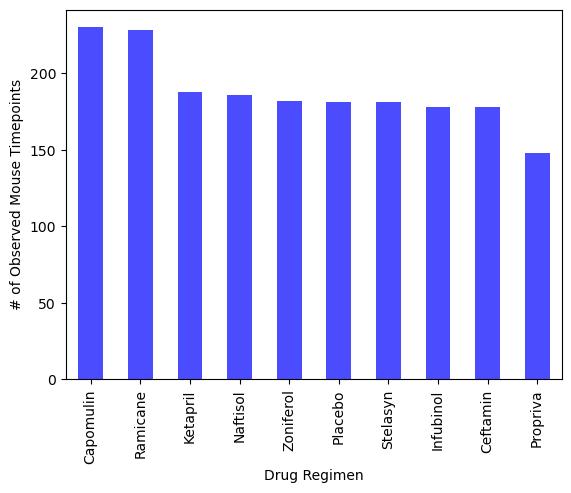

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = clean_mouse_df["Drug Regimen"].value_counts()
pandas_bar.plot(kind = "bar", color = "blue", alpha = 0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

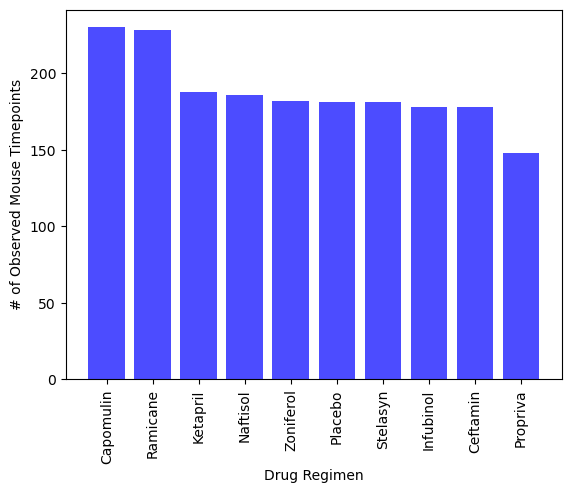

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar = clean_mouse_df["Drug Regimen"].value_counts()
x_axis = pyplot_bar.index.values
y_axis = pyplot_bar.values

plt.bar(x_axis, y_axis, color = "blue", alpha = 0.7, align = "center")
plt.xticks(rotation = 90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

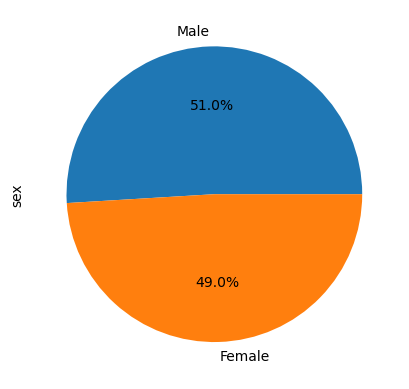

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = clean_mouse_df["Sex"].value_counts()
pandas_pie.plot.pie(autopct= "%1.1f%%")

plt.ylabel("sex")

plt.show()

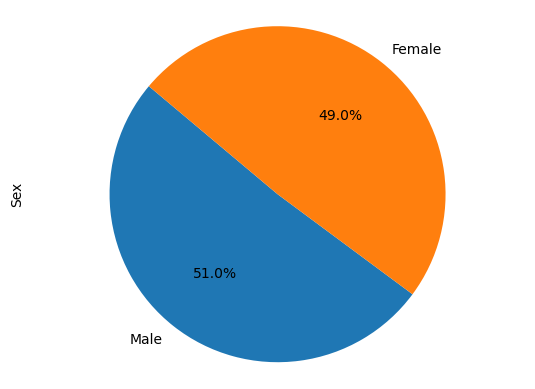

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = clean_mouse_df["Sex"].value_counts()
labels = ["Male", "Female"]
sizes = pyplot_pie.values
plt.ylabel("Sex")

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 140)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(treatment_list)] 

last_timepoint = drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_volumes = pd.merge(last_timepoint, clean_mouse_df, on = ["Mouse ID", "Timepoint"], how = "inner")
last_volumes.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds
outliers = {}

for drug in treatment_list:
    drug_data = last_volumes[last_volumes["Drug Regimen"] == drug]
    


    quartiles = drug_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    potential_outliers = drug_data[(drug_data["Tumor Volume (mm3)"] < lower_bound) | 
                                   (drug_data["Tumor Volume (mm3)"] > upper_bound)]
    
    if not potential_outliers.empty:
        outliers[drug] = potential_outliers
        
for drug, potential_outliers in outliers.items():
    
    print(f"Potential outliers for {drug}:")
    print(potential_outliers)

Potential outliers for Infubinol:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
15     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
15           36.321346                 0  


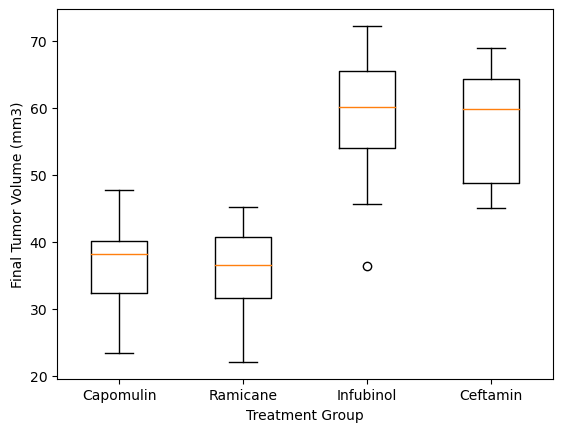

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = {}

for drug in treatment_list:
    drug_data = last_volumes[last_volumes["Drug Regimen"] == drug]
    tumor_volumes[drug] = drug_data["Tumor Volume (mm3)"]

plot_data = [tumor_volumes[drug] for drug in treatment_list]

plt.boxplot(plot_data, labels = treatment_list)
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

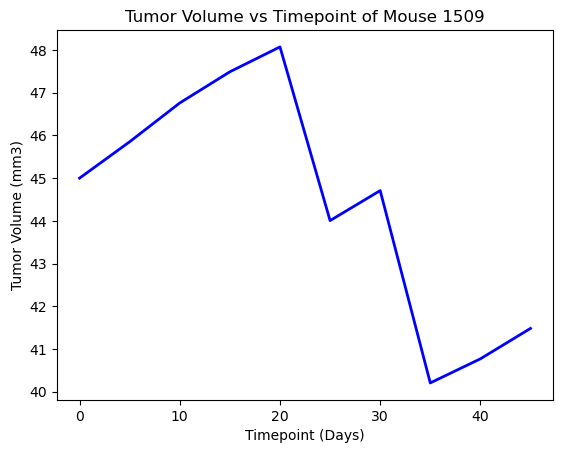

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]

mouse_id = "l509"
mouse_data = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color = 'blue', linewidth = 2)

plt.title("Tumor Volume vs Timepoint of Mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
           
plt.show()

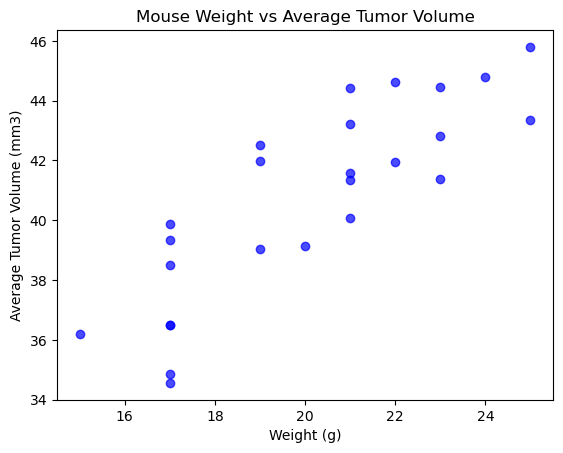

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_group = capomulin_df.groupby("Mouse ID").agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

plt.scatter(cap_group["Weight (g)"], cap_group["Tumor Volume (mm3)"], marker = "o", color = "blue", alpha = 0.7)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


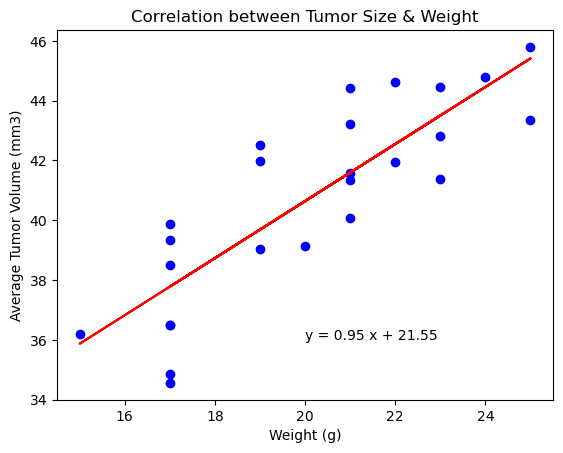

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = cap_group["Weight (g)"]
tumor_volume = cap_group["Tumor Volume (mm3)"]

correlation = weight.corr(tumor_volume)

plt.scatter(weight, tumor_volume, color = "blue")

slope, intercept, r_value, p_value, std_err = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(weight, regress_values, color = "red")

plt.title("Correlation between Tumor Size & Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
plt.annotate(line_eq, (20, 36))

plt.show()